In [1]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier, DecisionTreeClassifier, SklearnClassifier
from sklearn.svm import SVC
import pandas as pd
import re, string, random

import nltk


from nltk.tokenize import sent_tokenize, word_tokenize 

In [2]:
#You need the averaged_perceptron_tagger resource to determine the context of a word in a sentence
nltk.download('averaged_perceptron_tagger')
#wordnet is a lexical database for the English language that helps the script determine the base word
nltk.download('wordnet')
#The punkt module is a pre-trained model that helps you tokenize words and sentences
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saadz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saadz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saadz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
restaurants  = pd.read_csv('finalDF.csv')

In [4]:
restaurants = restaurants[restaurants['REVIEW'].notna()]

In [5]:
positive_reviews = restaurants.loc[restaurants['SENTIMENT'] == 'positive']
negative_reviews = restaurants.loc[restaurants['SENTIMENT'] == 'negative']

In [6]:
negative_reviews['REVIEW'] = negative_reviews['REVIEW'].astype(str)
negative_reviews['REVIEW'] = negative_reviews['REVIEW'].apply(word_tokenize)
negative_reviews = negative_reviews['REVIEW']

C:\Users\saadz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\saadz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
positive_reviews['REVIEW'] = positive_reviews['REVIEW'].astype(str)
positive_reviews['REVIEW'] = positive_reviews['REVIEW'].apply(word_tokenize)
positive_reviews = positive_reviews['REVIEW']

C:\Users\saadz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\saadz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
extraNegativeReviews = pd.read_csv('extraNegativeReviews.csv')
extraNegativeReviews['REVIEW'] = extraNegativeReviews['REVIEW'].astype(str)
extraNegativeReviews['REVIEW'] = extraNegativeReviews['REVIEW'].apply(word_tokenize)
extraNegativeReviews = extraNegativeReviews['REVIEW']

In [9]:
extraPositiveReviews = pd.read_csv('extraPositiveReviews.csv')
extraPositiveReviews['REVIEW'] = extraPositiveReviews['REVIEW'].astype(str)
extraPositiveReviews['REVIEW'] = extraPositiveReviews['REVIEW'].apply(word_tokenize)
extraPositiveReviews = extraPositiveReviews['REVIEW']

In [10]:
def remove_noise(review_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(review_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_reviews_for_model(cleaned_tokens_list):
    for review_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in review_tokens)

In [41]:
if __name__ == "__main__":

    
    stop_words = stopwords.words('english')
    new_stopwords = ["food","\'\s" "drink", "experience", "price", "order", "taste", "service", "location",
                    "place", "restaurant", "pizza", "burger", "burgers", "cream", "customer", "service", "work", "buy", "staff", "ice", "coffee", "..."]
    stop_words.extend(new_stopwords)
    stop_words = set(stop_words)
    exclude_words = set(("not", "wouldn't", "don't", "didn't", "doesn't", "wasn't", "won't", "wouldn", "no", "isn't"))
    new_stop_words = stop_words - exclude_words
    stop_words = list(new_stop_words)
    
    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []

    
    for tokens in positive_reviews:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
        
    for tokens in negative_reviews:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
    
    for tokens in extraNegativeReviews:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
        
    


    all_pos_words = get_all_words(positive_cleaned_tokens_list)

    freq_dist_pos = FreqDist(all_pos_words)
    print(freq_dist_pos.most_common(10))

    positive_tokens_for_model = get_reviews_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_reviews_for_model(negative_cleaned_tokens_list)

    positive_dataset = [(review_dict, "positive")
                         for review_dict in positive_tokens_for_model]

    negative_dataset = [(review_dict, "negative")
                         for review_dict in negative_tokens_for_model]
    

    dataset = positive_dataset + negative_dataset

    random.shuffle(dataset)

    train_data = dataset[:1000]
    test_data = dataset[1000:]

    nb_classifier = NaiveBayesClassifier.train(train_data)
    
    
    
    results = []
    accuracy = classify.accuracy(nb_classifier, test_data)
    results.append(accuracy)
    
    print("Accuracy of Naive Bayes Classifier is:", accuracy)

    print(nb_classifier.show_most_informative_features(10))
    
    print('---------------------------------------------------------------------\n')


[('good', 378), ('best', 122), ('great', 98), ('nice', 92), ('not', 82), ('tasty', 82), ('vegetarian', 76), ("'s", 72), ('friendly', 68), ('delicious', 58)]
Accuracy of Naive Bayes Classifier is: 0.907185628742515
Most Informative Features
                    nice = True           positi : negati =     16.5 : 1.0
                     bad = True           negati : positi =     14.6 : 1.0
              absolutely = True           negati : positi =     14.0 : 1.0
                    love = True           positi : negati =      9.5 : 1.0
                    cone = True           negati : positi =      9.4 : 1.0
                  minute = True           negati : positi =      9.4 : 1.0
                    come = True           negati : positi =      9.4 : 1.0
                   scoop = True           negati : positi =      9.1 : 1.0
              vegetarian = True           positi : negati =      8.8 : 1.0
              reasonable = True           positi : negati =      8.2 : 1.0
None
-----

In [55]:
dt_classifier = DecisionTreeClassifier.train(train_data)
accuracy = classify.accuracy(dt_classifier, test_data)
results.append(accuracy)
print("Accuracy of Decision Tree Classifier is:", accuracy)
print('---------------------------------------------------------------------\n')

Accuracy of Decision Tree Classifier is: 0.8989010989010989
---------------------------------------------------------------------



In [96]:
svm_classifier = SklearnClassifier(SVC(), sparse=False).train(train_data)
accuracy = classify.accuracy(svm_classifier, test_data)
results.append(accuracy)
print("Accuracy of SVM Classifier is:", accuracy)

Accuracy of SVM Classifier is: 0.9183098591549296


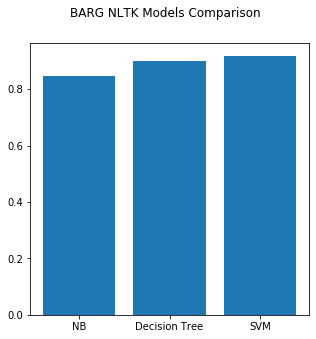

In [128]:
import matplotlib.pyplot as plt
names = ['NB', 'Decision Tree', 'SVM']
fig = plt.figure(figsize=(5,5))

fig.suptitle('BARG NLTK Models Comparison')
plt.bar(names, results)
plt.show()

In [38]:
len(dataset)

1334

In [99]:
print(results)

[0.847887323943662, 0.8989010989010989, 0.9183098591549296]


In [45]:
custom_review = "This restaurant is not tasty"

custom_tokens = remove_noise(word_tokenize(custom_review))

print(custom_review, nb_classifier.classify(dict([token, True] for token in custom_tokens)))

This restaurant is not tasty negative


In [46]:
import pickle
pickle.dump(nb_classifier, open('nltk_sentiment.pickle', 'wb'))